In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Central limit theorom (Point estimate)**

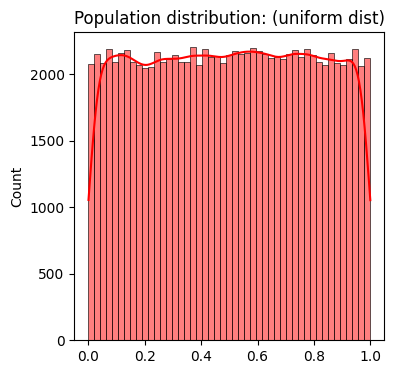

In [54]:
num_samples= 10000
sample_size= 50
dist_range = (0,1)

# generate samples from uniforn dist
population= np.random.uniform(0,1, 100000)

# plot the population graph
plt.figure(figsize=(4, 4))
sns.histplot(population, kde=True, color="red")
plt.title("Population distribution: (uniform dist)")
plt.show()

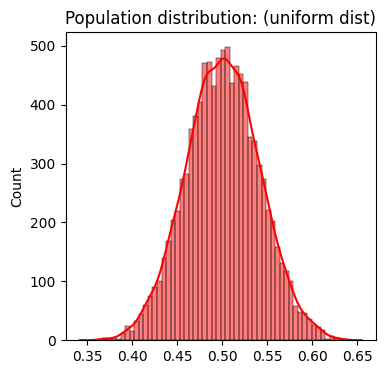

population mean : 0.5005
samples mean : 0.5008

population Standard deviation : 0.0407
samples Standard deviation : 0.0408


In [55]:
## randomely draw the samples from population
sample_means= []
for i in range(0, num_samples):
    sample = np.random.choice(population, 
                    size=sample_size, 
                    replace=True)
    sample_means.append(sample.mean())


# plot the population graph
plt.figure(figsize=(4, 4))
sns.histplot(sample_means, kde=True, color="red")
plt.title("Population distribution: (uniform dist)")
plt.show()

## here you can see the dist of sample mean follows Normal dist
print(f"population mean : {population.mean():.4f}" )
print(f"samples mean : {np.array(sample_means).mean():.4f}" )

print(f"\npopulation Standard deviation : {population.std()/(sample_size**0.5):.4f}" )
print(f"samples Standard deviation : {np.array(sample_means).std():.4f}" )

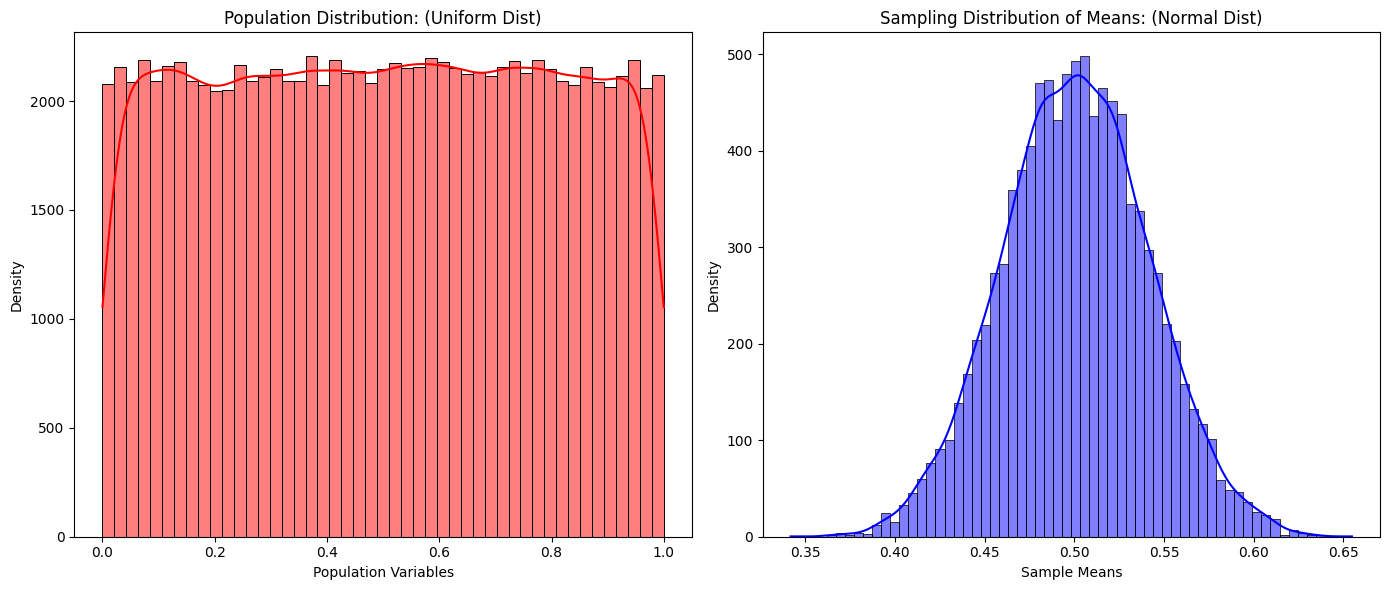

In [56]:
## Better Version
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(population, kde=True, color="red")
plt.title("Population Distribution: (Uniform Dist)")
plt.xlabel("Population Variables")
plt.ylabel("Density")

# Plot 2: Sampling Distribution of the Mean (Normal Approximation)
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, color="blue")
plt.title("Sampling Distribution of Means: (Normal Dist)")
plt.xlabel("Sample Means")
plt.ylabel("Density")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Confidence interval

In [ ]:
print()
#with 68% confidence interval
lower_limit= np.mean(sample_means) - np.std(sample_means)/np.sqrt(50)
upper_limit= np.mean(sample_means) + np.std(sample_means)/np.sqrt(50)
print(f"Sample means mean : {np.mean(sample_means)}")
print(f"Actual Population s mean : {np.mean(population)}")
print(f"The Population mean is in between range with 68% confidence interval : {lower_limit:.2f} - {upper_limit:.2f}")

In [81]:
## But the sample mean is not exactly same as Population mean, Instead of giving single value we provides the interval
## we can say that, Population mean is in between range (lower_limit to upper_limit)
## As the Sample mean dist is normal, we can appply emperical rule (68-95-99)
## So here, I'll use 95% condifence interval (2 std dev)

print()
#with 68% confidence interval
lower_limit= np.mean(sample_means) -  np.std(sample_means)/np.sqrt(50)
upper_limit= np.mean(sample_means) + np.std(sample_means)/np.sqrt(50)
print(f"Sample means mean : {np.mean(sample_means)}")
print(f"Actual Population s mean : {np.mean(population)}")
print(f"The Population mean is in between range with 68% confidence interval : {lower_limit:.4f} - {upper_limit:.4f}")

print()
lower_limit= np.mean(sample_means) - 2 * np.std(sample_means)/np.sqrt(50)
upper_limit= np.mean(sample_means) + 2 * np.std(sample_means)/np.sqrt(50)
#with 95% confidence interval
print(f"Sample means mean : {np.mean(sample_means)}")
print(f"Actual Population s mean : {np.mean(population)}")
print(f"The Population mean is in between range with 95% confidence interval : {lower_limit:.4f} - {upper_limit:.4f}")

print()
#with 99% confidence interval
lower_limit= np.mean(sample_means) -  3*np.std(sample_means)/np.sqrt(50)
upper_limit= np.mean(sample_means) + 3*np.std(sample_means)/np.sqrt(50)
print(f"Sample means mean : {np.mean(sample_means)}")
print(f"Actual Population s mean : {np.mean(population)}")
print(f"The Population mean is in between range with 99% confidence interval : {lower_limit:.4f} - {upper_limit:.4f}")


Sample means mean : 0.5008481727296369
Actual Population s mean : 0.5004805889315127
The Population mean is in between range with 68% confidence interval : 0.4951 - 0.5066

Sample means mean : 0.5008481727296369
Actual Population s mean : 0.5004805889315127
The Population mean is in between range with 95% confidence interval : 0.4893 - 0.5124

Sample means mean : 0.5008481727296369
Actual Population s mean : 0.5004805889315127
The Population mean is in between range with 99% confidence interval : 0.4835 - 0.5182


## Validate tha sample means follows normal dist

In [59]:
stats.shapiro(sample_means) # sample means follows a normal distribution

ShapiroResult(statistic=0.9998189361605997, pvalue=0.6093119380690102)

In [68]:
from scipy import stats
# The Kolmogorov-Smirnov test compares the sample distribution with a reference distribution. 
# In your case, you want to test whether the sample means follow a normal distribution.

# Perform the KS test on the sample means, comparing with the normal distribution
D_statistic, p_value = stats.ks_1samp(sample_means, 
                lambda x: stats.norm.cdf(x, 
                                        loc = np.mean(sample_means), 
                                        scale=np.std(sample_means))
                                        )

# Output the result
print(f"KS Statistic: {D_statistic}")
print(f"P-value: {p_value}")

# Interpretation of the result
if p_value < 0.05:
    print("The sample means do not follow a normal distribution.")
else:
    print("The sample means follow a normal distribution.")

KS Statistic: 0.007083746532707602
P-value: 0.6944745103950278
The sample means follow a normal distribution.
